In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./marketing.csv',encoding='cp949')
#print(df.head())
print(df.isna().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Target                 0
dtype: int64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
print(df.dtypes)

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Target                  int64
dtype: object


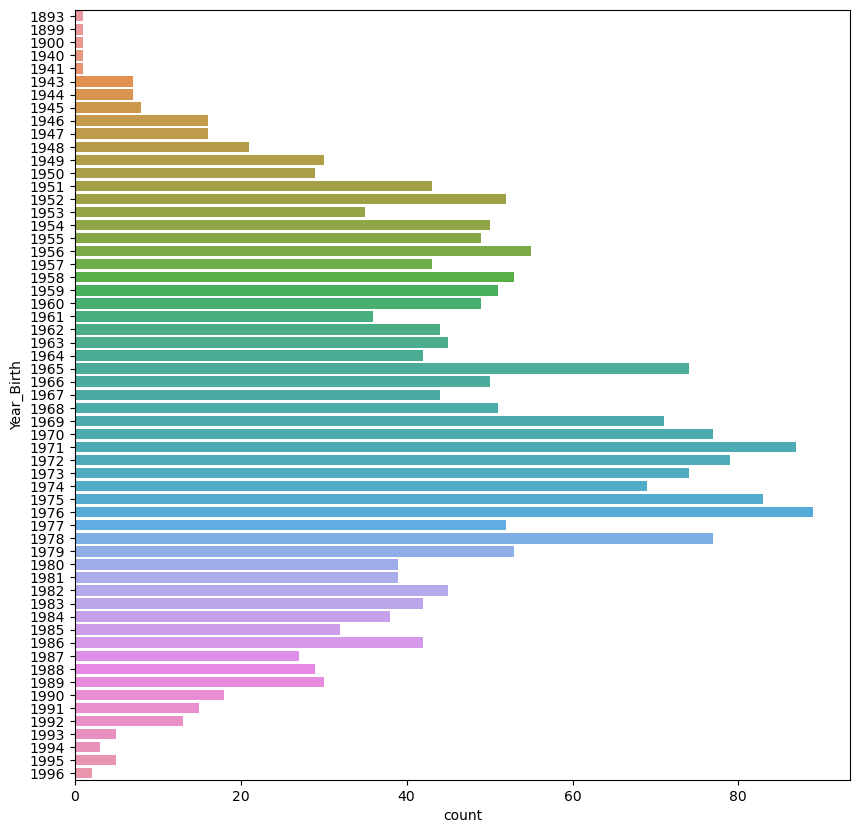

In [5]:
plt.figure(figsize=(10,10))
sns.countplot(df,y='Year_Birth',orient='h')
plt.show()

In [6]:
print(df['Year_Birth'].describe()) #평균 1968년생 50% 까지 70년생 
#최고 96년생 (현재 29)
#40-50대 위주 마케팅이라는 것을 알 수 있음

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


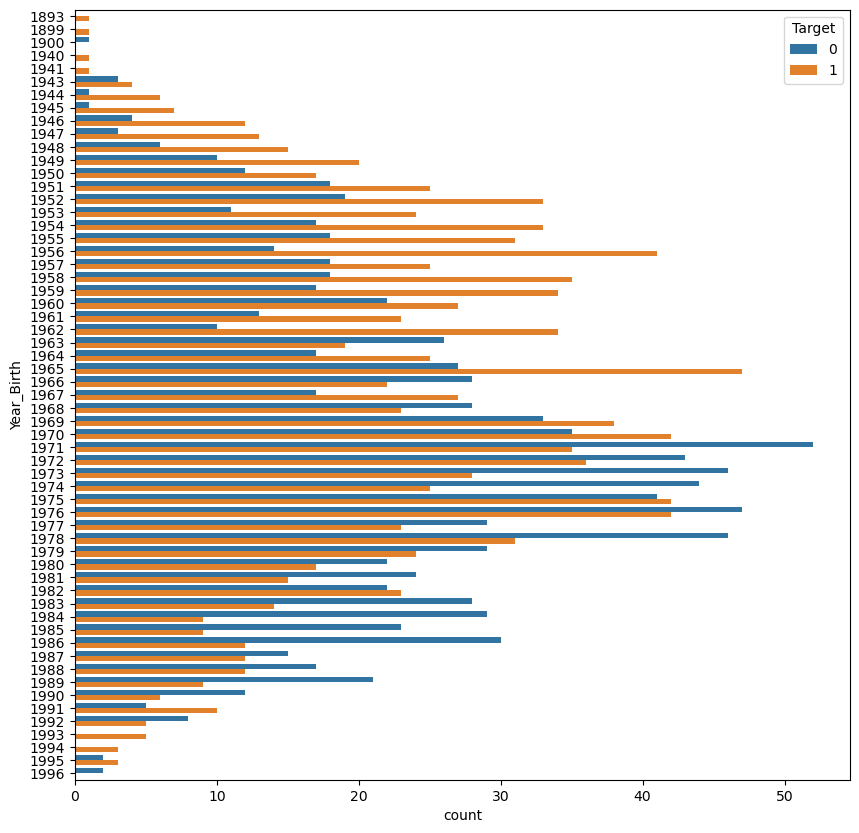

In [7]:
plt.figure(figsize=(10,10))

sns.countplot(df,y='Year_Birth',hue='Target',orient='h')
plt.show()
#타겟은 높은 연력층에 분포함 -> 결혼을 했거나 아이가 많을 확률이 높지않을까..?

In [8]:
print(df['Education'].unique()) #Graduation PhD Master Basic(고등학교), 2n Cycle(석사) 
#따라서 2n Cycle을 Master로 합쳐준다
def change(data):
    if data == '2n Cycle':
        data = 'Master'
    return data

df['Education'] = df['Education'].apply(lambda x : change(x))
print(df['Education'].unique())


['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Graduation' 'PhD' 'Master' 'Basic']


<Axes: xlabel='Education', ylabel='count'>

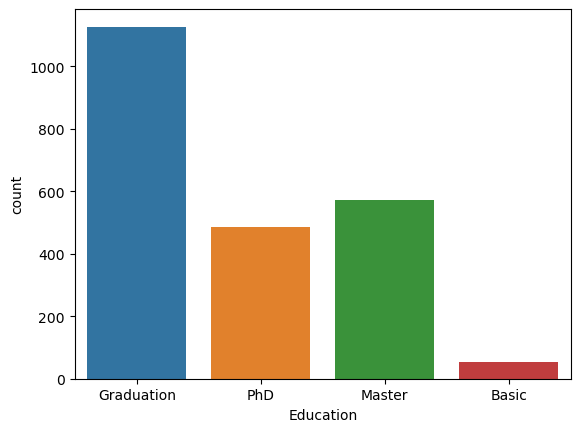

In [9]:
sns.countplot(df,x='Education') #우리나라 특성상 교육수준은 비슷한 것을 확인
#따라서 딱히 쓸모없는 데이터일 가능성 높음 (추후 검증 예정)

<Axes: xlabel='Education', ylabel='count'>

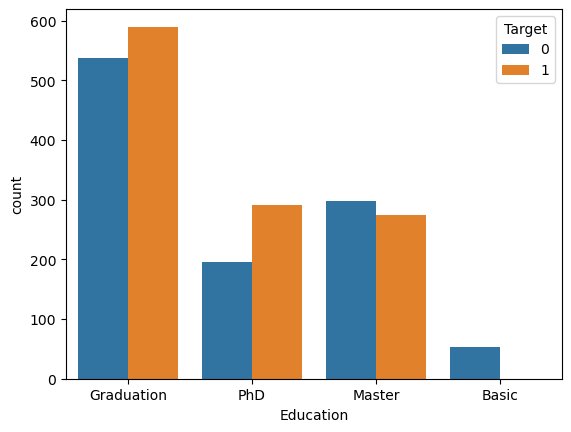

In [10]:
sns.countplot(df,x='Education',hue='Target') #가장 차이가 많이나는 것은 PhD임 교육품목일 수 있지않을까?

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


<Axes: xlabel='Marital_Status', ylabel='count'>

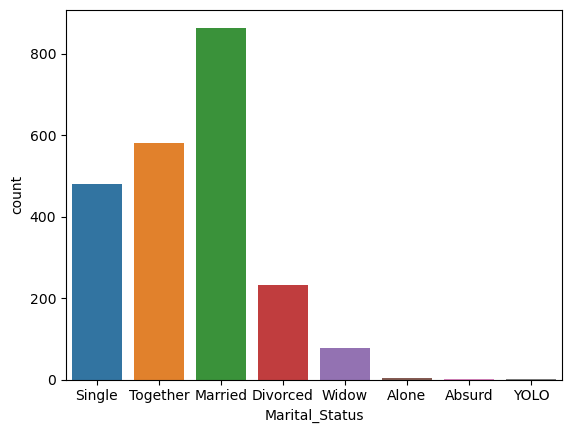

In [11]:
print(df['Marital_Status'].unique())
sns.countplot(df,x='Marital_Status') # Alone Absrd, YOLO는 없다고 봐도 무방함

<Axes: xlabel='Marital_Status', ylabel='count'>

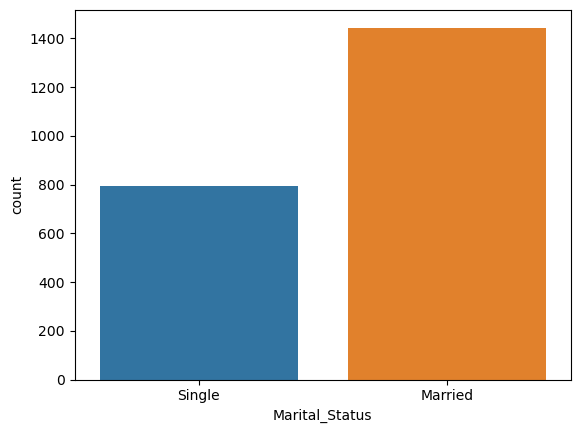

In [12]:
#Alone Absurd YOLO Divorced Widow는 하나이므로 Single로 합쳐주고 Together Married 도 합쳐준다
solo_list = ['Alone','Absurd','YOLO','Divorced','Widow']
couple_list = ['Together']

def change(data):
    if data in solo_list:
        data = 'Single'
    elif data in couple_list:
        data = 'Married'
    return data

df['Marital_Status'] = df['Marital_Status'].apply(lambda x : change(x))
sns.countplot(df,x='Marital_Status')

<Axes: xlabel='Marital_Status', ylabel='count'>

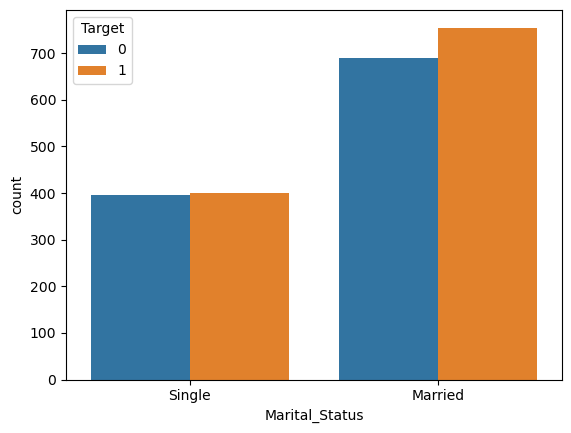

In [13]:
sns.countplot(df,x='Marital_Status',hue='Target') #결혼의 유무는 딱히 고려대상이 아님

count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64


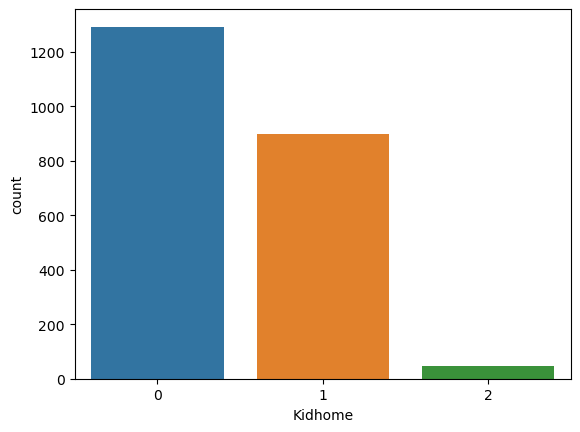

In [14]:
print(df['Kidhome'].describe()) #평균 0.44명
sns.countplot(df,x='Kidhome') #대부분이 0명 아니면 1명 
#따라서 애가 있고 없고로 구분해준다.
def change(data):
    if data == 2:
        data = 1
    return data




<Axes: xlabel='Kidhome', ylabel='count'>

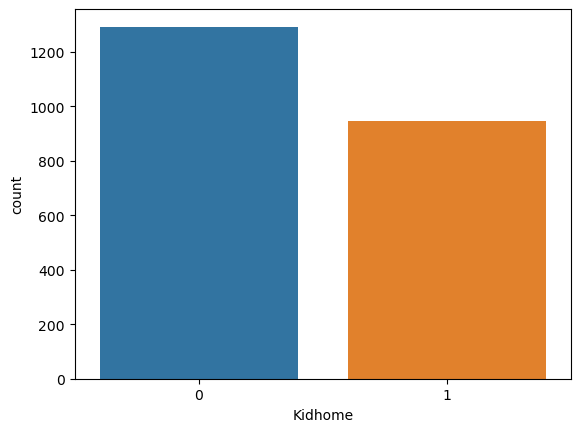

In [15]:
df['Kidhome'] = df['Kidhome'].apply(lambda x : change(x))
sns.countplot(df,x='Kidhome')

<Axes: xlabel='Kidhome', ylabel='count'>

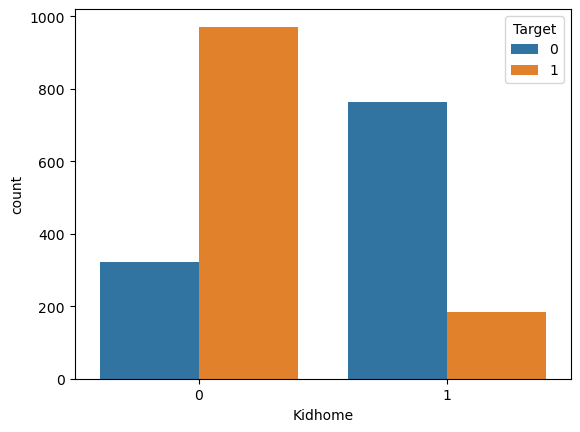

In [16]:
sns.countplot(df,x='Kidhome',hue='Target') #애가 없는 사람들을 대상으로 하는 것을 확인함

In [17]:
print(df['Teenhome'].describe()) #위와 다르지 않은 데이터이기 때문에 pass

count    2240.000000
mean        0.506250
std         0.544538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64


<Axes: xlabel='Teenhome', ylabel='count'>

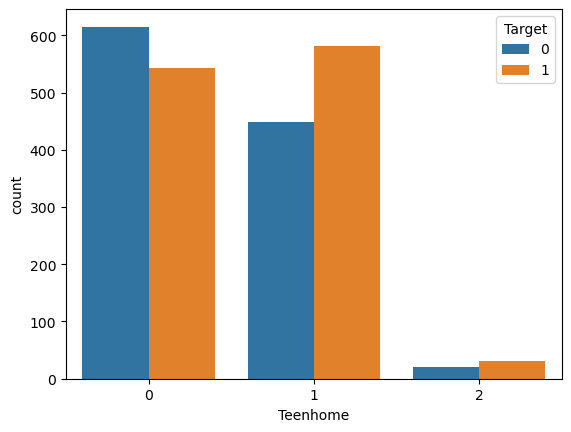

In [18]:
sns.countplot(df,x='Teenhome',hue='Target') #데이터 말이안됨 데이터 설명이 틀린듯 10대 미만과 10대 이상 으로 구분되면 말이 될듯함

In [19]:
#회사에 고객으로 등록한 날짜이다
import datetime as dt
df['Dt_Customer']= df['Dt_Customer'].apply(lambda x : pd.to_datetime(x))

C:\Users\BIG3-09\AppData\Local\Temp\ipykernel_20360\1202709329.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Dt_Customer']= df['Dt_Customer'].apply(lambda x : pd.to_datetime(x))


In [20]:
df['Dt_Customer']= df['Dt_Customer'].apply(lambda x : x.year) #year로 구분함

print(df['Dt_Customer'].describe())

count    2240.000000
mean     2013.028125
std         0.684554
min      2012.000000
25%      2013.000000
50%      2013.000000
75%      2013.000000
max      2014.000000
Name: Dt_Customer, dtype: float64


<Axes: xlabel='Dt_Customer', ylabel='count'>

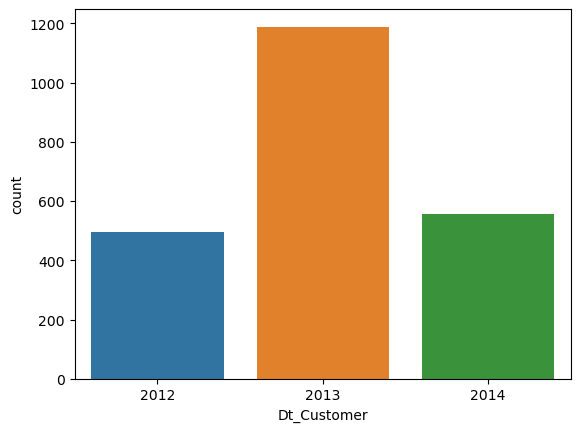

In [21]:
sns.countplot(df,x = 'Dt_Customer') #2013년에 가장 많이 등록함

<Axes: xlabel='Dt_Customer', ylabel='count'>

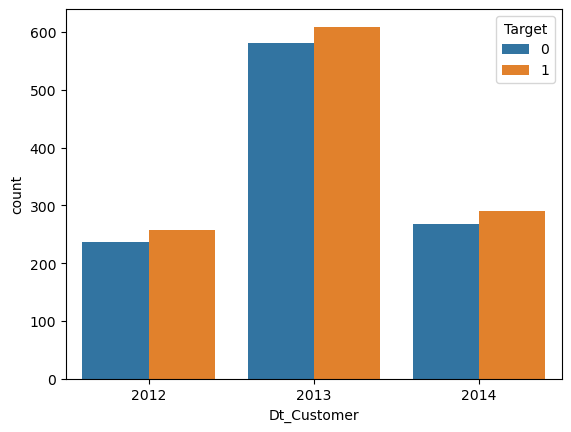

In [22]:
sns.countplot(df,x='Dt_Customer',hue='Target') #가입 년도는 Target에 영향이 없어보임

In [23]:
print(df['Recency']) #Recency : 최근 구매일자 (아마 구매하고 지난 날짜를 표시한 것 같음)

0       58
1       38
2       26
3       26
4       94
        ..
2235    46
2236    56
2237    91
2238     8
2239    40
Name: Recency, Length: 2240, dtype: int64


In [24]:
print(df['Recency'].describe()) #평균 구매한지 49일 지남 수치형?

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


In [25]:
print(df['MntWines'].describe()) #평균 303 수치형

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64


In [26]:
print(df['MntFruits'].describe()) #평균 26개 수치형

count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64


In [27]:
print(df['MntMeatProducts'].describe()) #166 단위모름 수치형

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64


<Axes: xlabel='NumDealsPurchases', ylabel='count'>

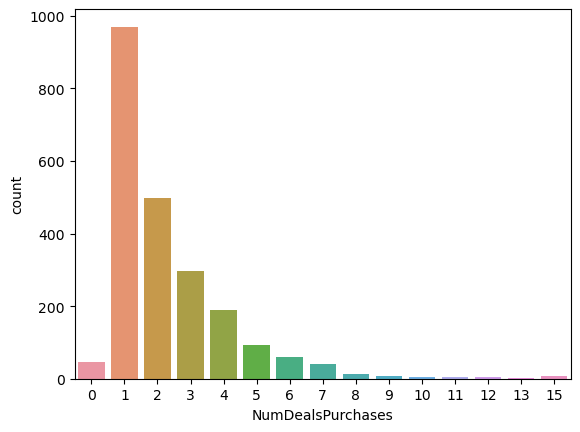

In [28]:
sns.countplot(df,x = 'NumDealsPurchases') #할인받아서 1번사고 2번부터 빠르게 줄어듬 
#쿠폰이 없나

<Axes: xlabel='NumDealsPurchases', ylabel='count'>

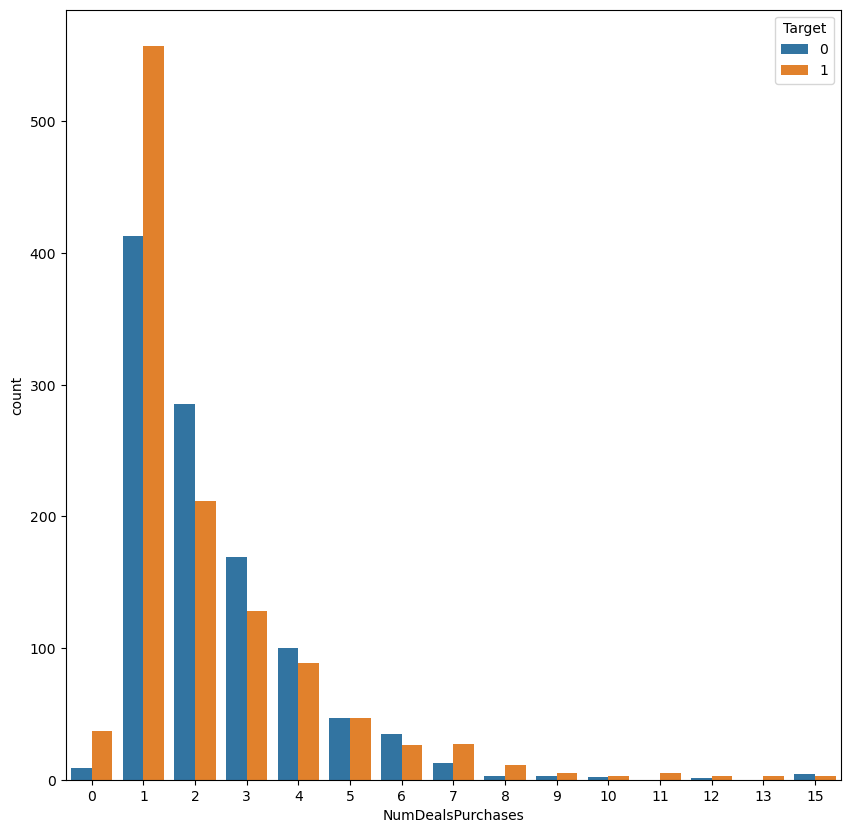

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(df,x='NumDealsPurchases',hue='Target') #주요 타겟층은 할인으로 구매를 한번만 했거나 아예 구매를 하지 않은 사람

<Axes: xlabel='NumWebPurchases', ylabel='count'>

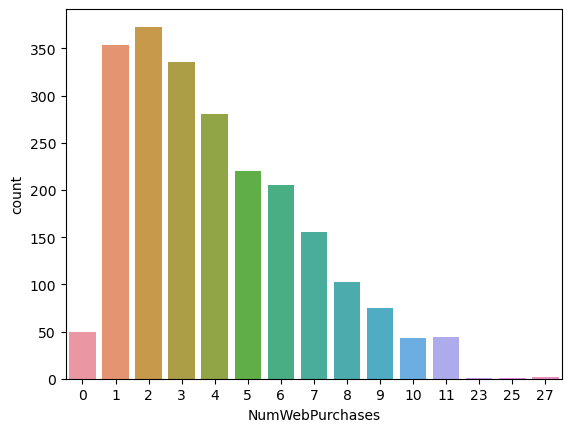

In [30]:
sns.countplot(df,x='NumWebPurchases') #대부분의 유저가 1번이상 웹사이트 사용해서 구매함

<Axes: xlabel='NumWebPurchases', ylabel='count'>

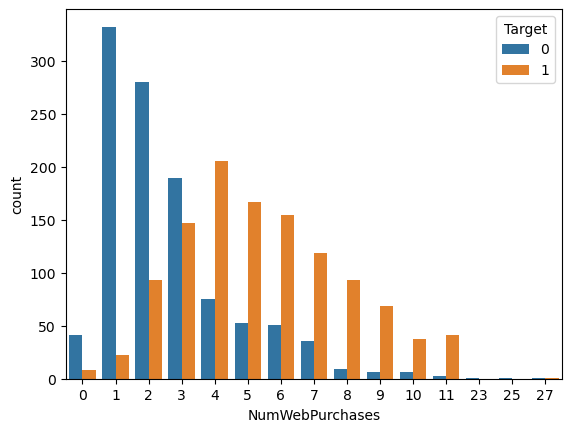

In [31]:
sns.countplot(df,x='NumWebPurchases',hue='Target') #웹을 많이 사용해서 구매한 사람이 타겟

<Axes: xlabel='NumCatalogPurchases', ylabel='count'>

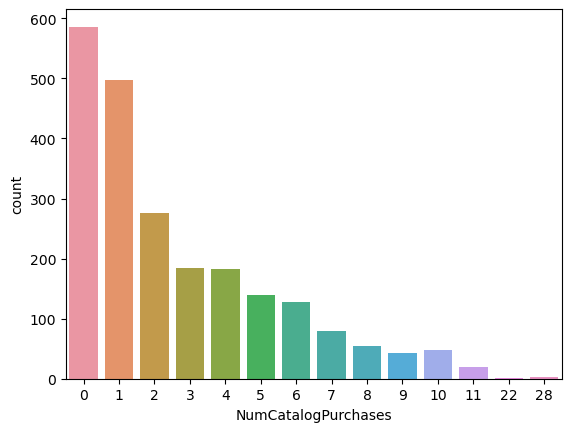

In [32]:
sns.countplot(df,x='NumCatalogPurchases') #카탈로그는 뭔지 모르겠음

<Axes: xlabel='NumStorePurchases', ylabel='count'>

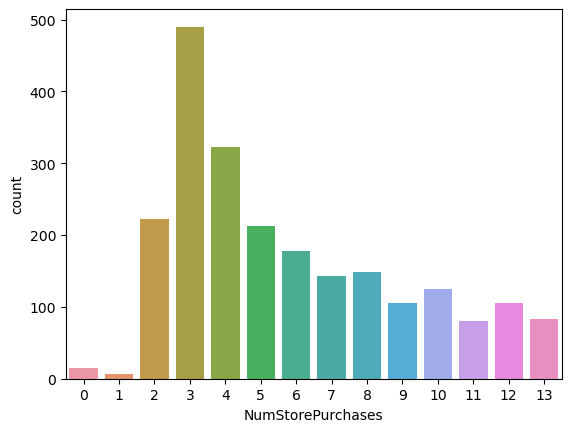

In [33]:
sns.countplot(df,x='NumStorePurchases') #직접 가는 횟수가 어느정도 있음

<Axes: xlabel='NumStorePurchases', ylabel='count'>

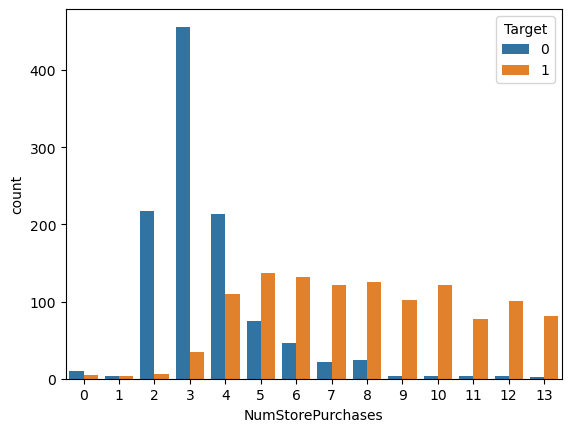

In [34]:
sns.countplot(df,x='NumStorePurchases',hue='Target') #또한 직접 자주 방문하는 사람

<Axes: xlabel='NumWebVisitsMonth', ylabel='count'>

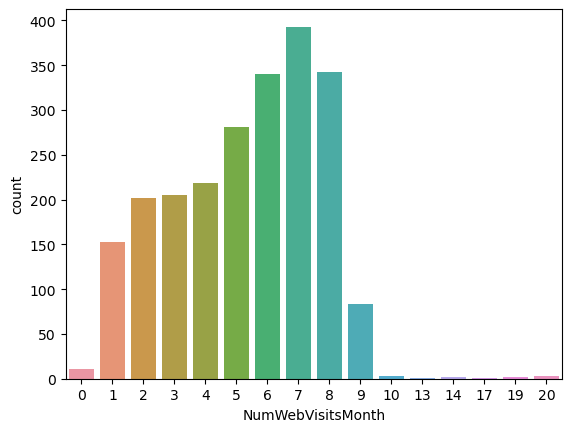

In [35]:
sns.countplot(df,x='NumWebVisitsMonth') #웹사이트에는 자주 접속함 하지만 웹사이트 구매로 많이 이동하진 않는듯

<Axes: xlabel='NumWebVisitsMonth', ylabel='count'>

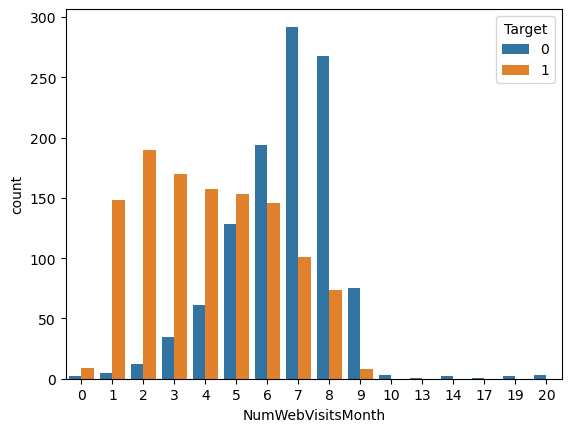

In [36]:
sns.countplot(df,x='NumWebVisitsMonth',hue='Target') #몇번 방문하지 않는 사람이 타겟임

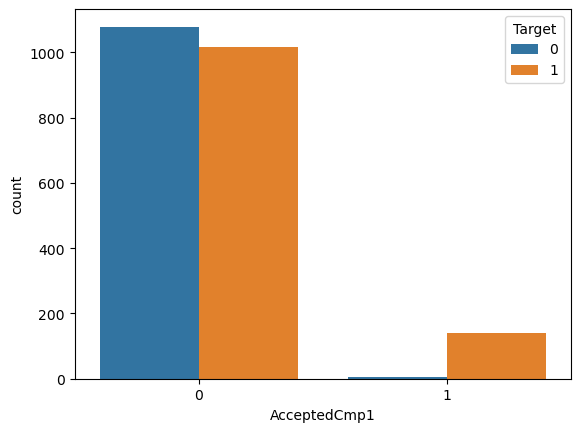

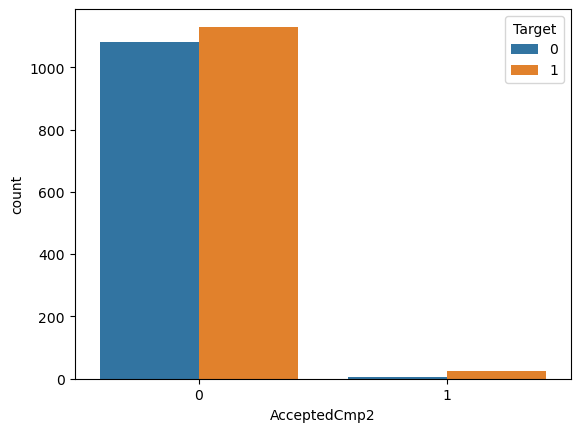

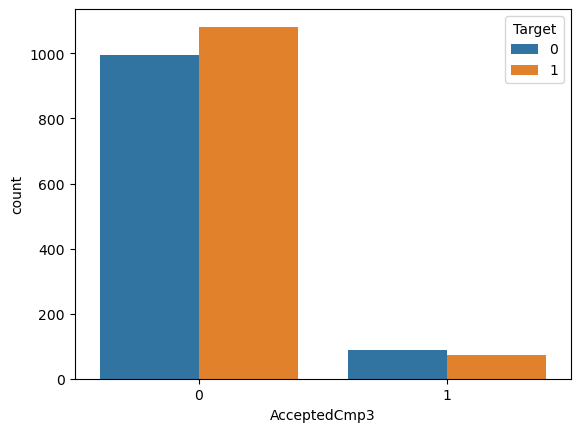

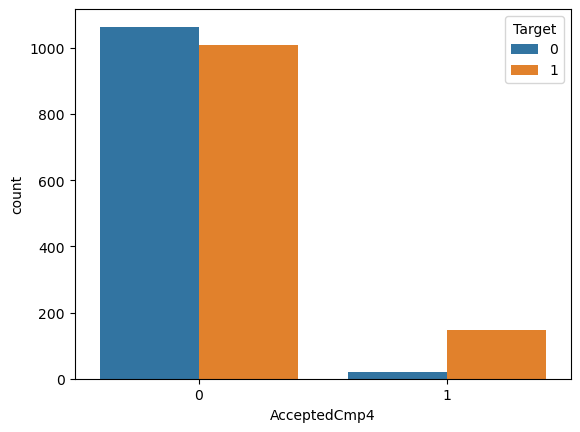

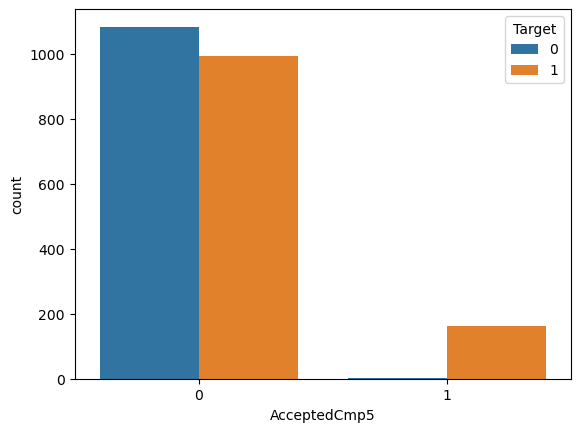

In [37]:
#figure, axes = plt.subplots(1, 5)
cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

for i in cols:
    sns.countplot(df,x=df[i],hue='Target')
    plt.show()


In [38]:
#딱히 여러번한다고 유의미한 증가는 없는 것 같음

<Axes: xlabel='Complain', ylabel='count'>

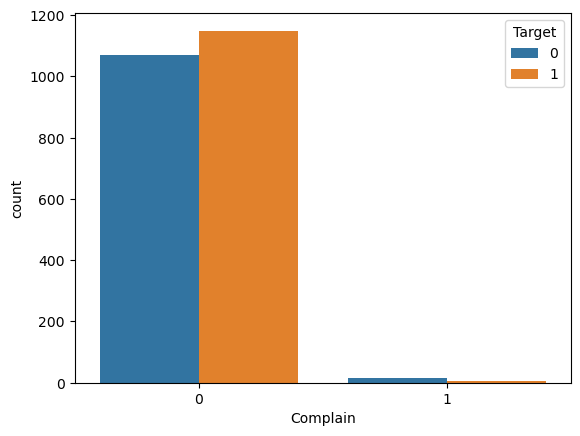

In [39]:
sns.countplot(df,x='Complain',hue='Target') #컴플레인은 거의 없음 무의미함

0       1
1       0
2       1
3       0
4       1
       ..
2235    1
2236    1
2237    1
2238    1
2239    1
Name: Target, Length: 2240, dtype: int64


<Axes: xlabel='Target', ylabel='count'>

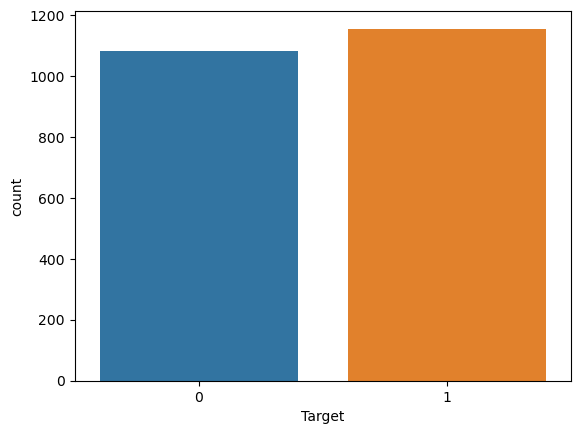

In [40]:
print(df['Target'])
sns.countplot(df,x='Target') #비슷한 비율

In [41]:

'''
결론 
마케팅 대상은 다음과 같다
１。 연령대가 ４０－５０대를 타겟으로 한다。(아이가 있는사람을 타겟으로하나?)
２。 학력에 따른 타겟은 설정되지 않아보인다。(비율상 박사가 높음)
３。 결혼 유무에 따르진 않는다。
４。 ｋｉｄ가 없는 집을 타겟으로 한다。
５。 Ｔｅｅｎ은 큰 영향을 주진 못하는 것으로 보인다
６。 가입 기간에 따른 영향 또한 없다
７。 할인으로 구매를 한번만 했거나 아예 없는 사람들이 비율상 타겟이 높다
８。 웹에서 자주 구매한 사람들이 타겟일 확률이 높다
９。 직접 자주 방문해도 타겟일 확률이 높다
１０。 웹을 몇번 방문하지 않았던 사람들이 타겟일 확률이 높다
１１。 캠페인 여부는 큰 영향을 끼치지 못한다。
１２。 컴플레인 또한 큰 영향을 주지 못한다。

drop : 학력, 결혼, Teen, 가입기간, 캡페인, 컴플레인
use : 연령대 kid 할인으로구매, 웹 자주 구매, 직접 자주 방문, 웹 별로 안방문
'''

'\n결론 \n마케팅 대상은 다음과 같다\n１。 연령대가 ４０－５０대를 타겟으로 한다。(아이가 있는사람을 타겟으로하나?)\n２。 학력에 따른 타겟은 설정되지 않아보인다。(비율상 박사가 높음)\n３。 결혼 유무에 따르진 않는다。\n４。 ｋｉｄ가 없는 집을 타겟으로 한다。\n５。 Ｔｅｅｎ은 큰 영향을 주진 못하는 것으로 보인다\n６。 가입 기간에 따른 영향 또한 없다\n７。 할인으로 구매를 한번만 했거나 아예 없는 사람들이 비율상 타겟이 높다\n８。 웹에서 자주 구매한 사람들이 타겟일 확률이 높다\n９。 직접 자주 방문해도 타겟일 확률이 높다\n１０。 웹을 몇번 방문하지 않았던 사람들이 타겟일 확률이 높다\n１１。 캠페인 여부는 큰 영향을 끼치지 못한다。\n１２。 컴플레인 또한 큰 영향을 주지 못한다。\n\ndrop : 학력, 결혼, Teen, 가입기간, 캡페인, 컴플레인\nuse : 연령대 kid 할인으로구매, 웹 자주 구매, 직접 자주 방문, 웹 별로 안방문\n'

<Axes: xlabel='Target', ylabel='MntWines'>

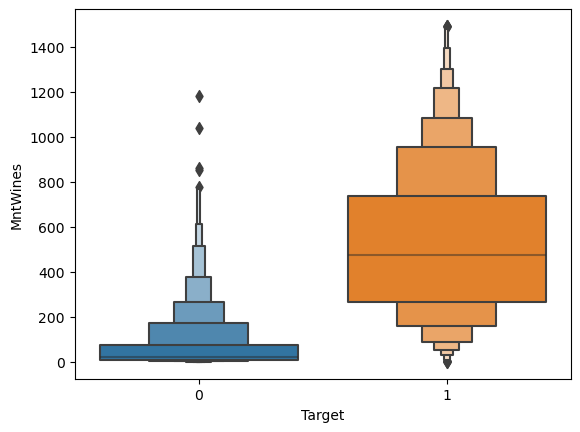

In [42]:
#수치형 분석
#print(df.dtypes) #mntWine mntFruit mntMeatProducts
sns.boxenplot(df,y='MntWines',x='Target')

<Axes: xlabel='Target', ylabel='MntFruits'>

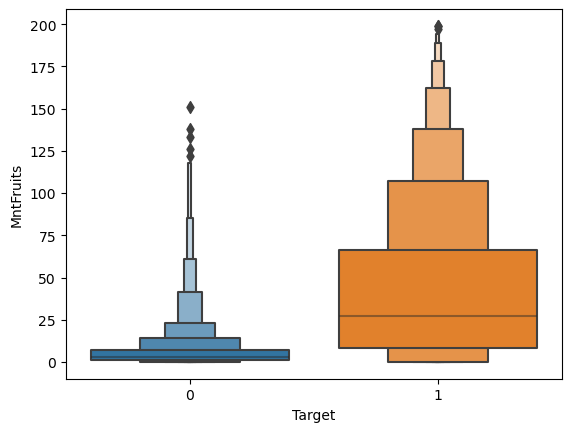

In [43]:
sns.boxenplot(df,y='MntFruits',x='Target')

<Axes: xlabel='Target', ylabel='MntMeatProducts'>

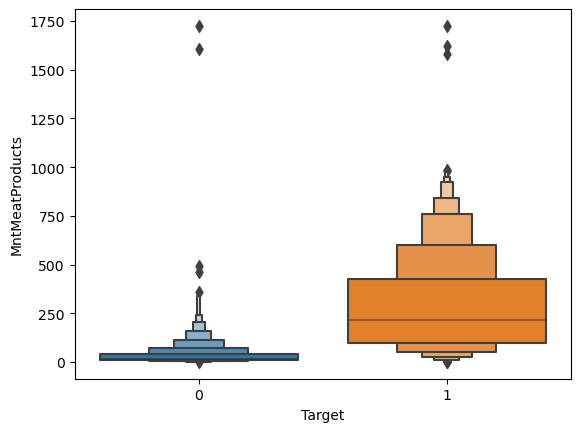

In [44]:
sns.boxenplot(df,y='MntMeatProducts',x='Target')

In [45]:
#자주 구매한 사람들을 타겟으로 하니 이 부분은 당연하다고 보인다.
num_df = df[['MntMeatProducts','MntWines','MntFruits']]
num_df = num_df.corr()

In [46]:
print(num_df) #50%이상 상관은 있음

                 MntMeatProducts  MntWines  MntFruits
MntMeatProducts         1.000000  0.562667   0.543105
MntWines                0.562667  1.000000   0.389637
MntFruits               0.543105  0.389637   1.000000


<Axes: xlabel='NumDealsPurchases', ylabel='MntWines'>

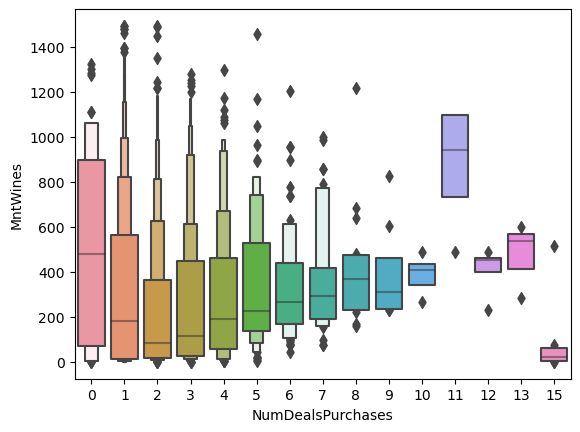

In [47]:
sns.boxenplot(df,x='NumDealsPurchases',y='MntWines')

<Axes: xlabel='NumDealsPurchases', ylabel='MntMeatProducts'>

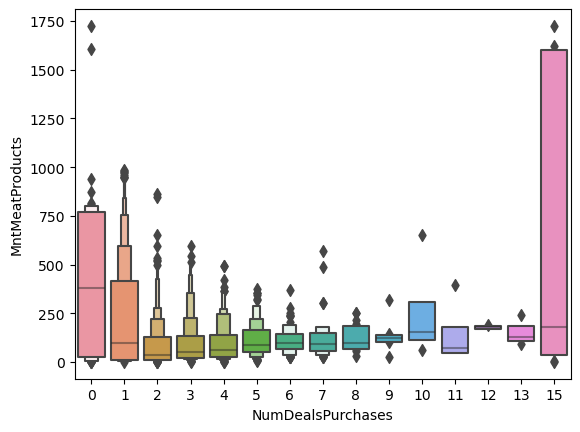

In [48]:
sns.boxenplot(df,x='NumDealsPurchases',y='MntMeatProducts')

<Axes: xlabel='NumDealsPurchases', ylabel='MntFruits'>

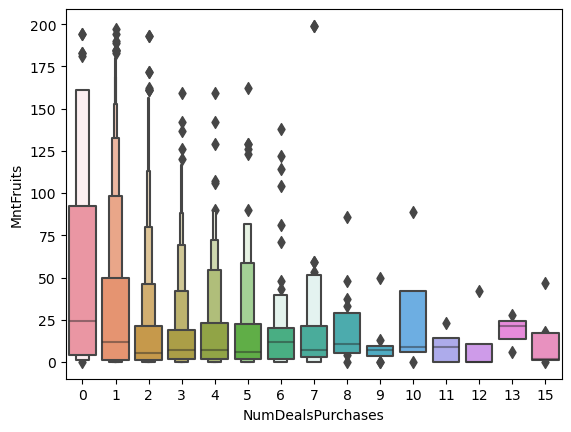

In [49]:
sns.boxenplot(df,x='NumDealsPurchases',y='MntFruits')

In [50]:
print(df[['MntFruits','NumDealsPurchases']].corr()) #상관 없음
print(df[['MntMeatProducts','NumDealsPurchases']].corr()) #상관 없음

                   MntFruits  NumDealsPurchases
MntFruits           1.000000          -0.132114
NumDealsPurchases  -0.132114           1.000000
                   MntMeatProducts  NumDealsPurchases
MntMeatProducts           1.000000          -0.122415
NumDealsPurchases        -0.122415           1.000000


In [51]:
#수치형 데이터끼리 상관이 없으므로 linear사용
num_df = df[['MntMeatProducts','MntWines','MntFruits','Target']]

from sklearn.model_selection import train_test_split
train,test = train_test_split(num_df,random_state=42,train_size=0.8)
target_train = train['Target']
target_test = test['Target']

features_train = train.drop('Target',axis=1)
features_test = test.drop('Target',axis=1)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
logits = make_pipeline(StandardScaler(),LogisticRegression())
logits.fit(features_train,target_train)
acc = logits.score(features_test,target_test)
print(acc)

0.8772321428571429


In [53]:
from sklearn.manifold import TSNE
import numpy as np
pred = logits.predict(features_test)
tsne = TSNE(n_components=2,metric='cosine',random_state=42)

feat = tsne.fit_transform(np.array(features_test))
fig = px.scatter(x = feat[:,0],y = feat[:,1],color=pred,width=1200, height=1200) #tsne 그려줌
fig.show()

In [54]:
#drop : 학력, 결혼, Teen, 가입기간, 캡페인, 컴플레인
#use : 연령대 kid 할인으로구매, 웹 자주 구매, 직접 자주 방문, 웹 별로 안방문

In [55]:
drop_df = df.drop(['Education','Marital_Status','Teenhome','Dt_Customer','AcceptedCmp3','AcceptedCmp1','AcceptedCmp2','AcceptedCmp4','AcceptedCmp5','Complain'],axis=1)

In [56]:
drop_df = drop_df.drop('ID',axis=1)

In [57]:
drop_df = drop_df.drop(['MntWines','MntFruits','MntMeatProducts'],axis=1)

Year_Birth            -0.201943
Kidhome               -0.549229
Recency                0.006558
NumDealsPurchases     -0.022520
NumWebPurchases        0.499041
NumCatalogPurchases    0.614610
NumStorePurchases      0.669956
NumWebVisitsMonth     -0.540495
Target                 1.000000
Name: Target, dtype: float64


<Axes: >

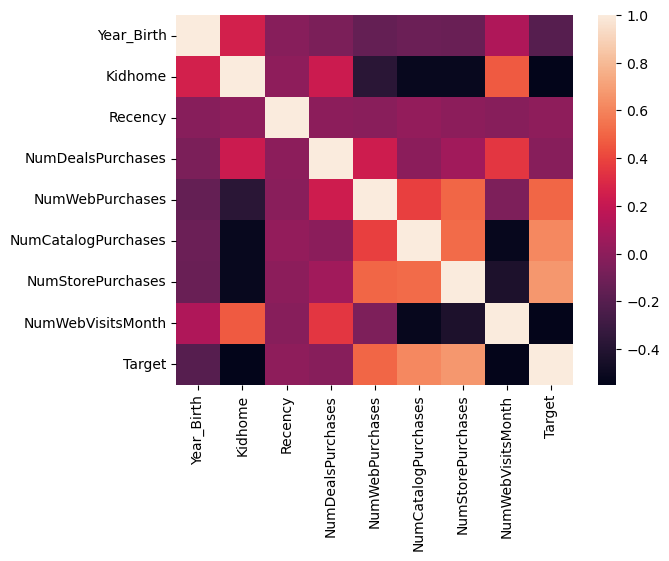

In [58]:
print(drop_df.corr()['Target'])
sns.heatmap(drop_df.corr())
#그나마 가장 영향있다고 판단한 것들 중에서는 NumStorePurchases, NumcatalogPurchases, NumWebPurchases 가 높았다

In [59]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(drop_df,random_state=42,train_size=0.8)
target_train = train['Target']
target_test = test['Target']

features_train = train.drop('Target',axis=1)

features_test = test.drop('Target',axis=1)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
logits = make_pipeline(StandardScaler(),LogisticRegression())
logits.fit(features_train,target_train)
acc = logits.score(features_test,target_test)
print(acc)

0.875


In [60]:
from sklearn.manifold import TSNE
import numpy as np
pred = logits.predict(features_test)
print(pred)
tsne = TSNE(n_components=2,metric='cosine',random_state=42)

feat = tsne.fit_transform(np.array(features_test))
fig = px.scatter(x = feat[:,0],y = feat[:,1],color=pred,width=1200, height=1200) #tsne 그려줌
fig.show()

[1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1
 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1
 1 1 1 0]


In [61]:
from sklearn.tree import DecisionTreeClassifier
logits = make_pipeline(StandardScaler(),DecisionTreeClassifier())
logits.fit(features_train,target_train)
acc = logits.score(features_test,target_test)
print(acc)

0.8370535714285714


In [62]:
from sklearn.manifold import TSNE
import numpy as np
pred = logits.predict(features_test)
print(pred)
tsne = TSNE(n_components=2,metric='cosine',random_state=42)

feat = tsne.fit_transform(np.array(features_test))
fig = px.scatter(x = feat[:,0],y = feat[:,1],color=pred,width=1200, height=1200) #tsne 그려줌
fig.show()

[1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1
 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0
 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 0 1 0 1]


In [63]:
from sklearn.ensemble import RandomForestClassifier
logits = make_pipeline(StandardScaler(),RandomForestClassifier())
logits.fit(features_train,target_train)
acc = logits.score(features_test,target_test)
print(acc)

0.9017857142857143


In [64]:
from sklearn.manifold import TSNE
import numpy as np
pred = logits.predict(features_test)
print(pred)
tsne = TSNE(n_components=2,metric='cosine',random_state=42)

feat = tsne.fit_transform(np.array(features_test))
fig = px.scatter(x = feat[:,0],y = feat[:,1],color=pred,width=1200, height=1200) #tsne 그려줌
fig.show()

[1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1
 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1
 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1
 0 1 1 0]


In [65]:
#수치형 데이터끼리 상관이 없으므로 linear사용
num_df = df[['MntMeatProducts','MntWines','MntFruits','Target']]

from sklearn.model_selection import train_test_split
train,test = train_test_split(num_df,random_state=42,train_size=0.8)
target_train = train['Target']
target_test = test['Target']

features_train = train.drop('Target',axis=1)
features_test = test.drop('Target',axis=1)

from sklearn.ensemble import RandomForestClassifier
logits = make_pipeline(StandardScaler(),RandomForestClassifier())
logits.fit(features_train,target_train)
acc = logits.score(features_test,target_test)
print(acc)

from sklearn.manifold import TSNE
import numpy as np
pred = logits.predict(features_test)
print(pred)
tsne = TSNE(n_components=2,metric='cosine',random_state=42)

feat = tsne.fit_transform(np.array(features_test))
fig = px.scatter(x = feat[:,0],y = feat[:,1],color=pred,width=1200, height=1200) #tsne 그려줌
fig.show()

0.8794642857142857
[1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1
 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1
 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1
 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1
 0 1 0 0]
